## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/loan dataset.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Lets fix the null values

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

filling the null values for object type- Mode,
                            Float or Int type- mean

In [6]:
ob_col=[]
num_col=[]
for i in data.columns:
  if(data[i].dtype == 'object'):

    data[i] = data[i].fillna(data[i].mode()[0])
    ob_col.append(i)
    

  else:
      data[i] = data[i].fillna(data[i].mean())
      num_col.append(i)


In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [9]:
data.shape

(614, 13)

#lets fix the outliers

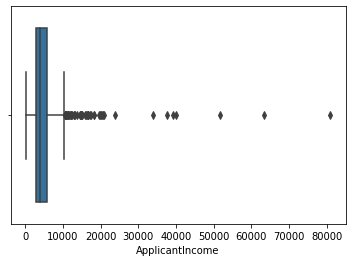

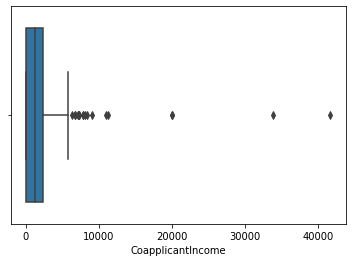

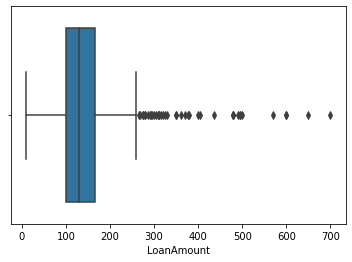

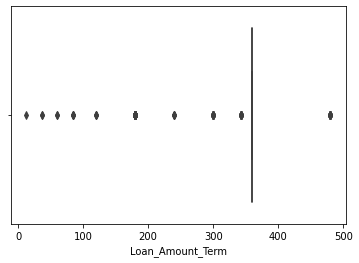

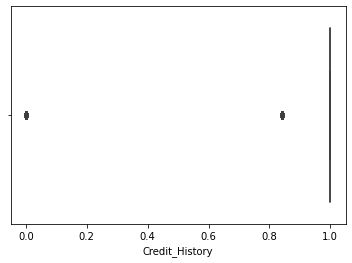

In [10]:
for i in num_col:
  sns.boxplot(x= data[i])
  plt.show()

In [11]:
num_col #only columns which have outliers

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Using IQR METHOD to remove outliers

In [12]:
o_col =['ApplicantIncome','CoapplicantIncome','LoanAmount']

for i in o_col:
  a = data[i].quantile(0.25)
  b = data[i].quantile(0.75)
  iqr = b-a
  
  data = data[(data[i]>=a-1.5*iqr) & (data[i]<=b+1.5*iqr )]
   

In [13]:
#converting output categorical column into numerical column
od = {'Y':1,'N':0}
data['Loan_Status'] = data['Loan_Status'].map(od)

In [14]:
#removing the Loan_ID column because it will not create any significant impact on my model.

In [15]:
data = data.drop('Loan_ID',axis=1)

In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


#EDA

#Male VS Female

In [17]:
Male_loan=data[data['Gender']=='Male']
female_loan=data[data['Gender']=='Female']


male_per=Male_loan['Loan_Status'].value_counts()
male_per = male_per/Male_loan.shape[0]*100

female_per=female_loan['Loan_Status'].value_counts()
female_per = female_per/female_loan.shape[0]*100


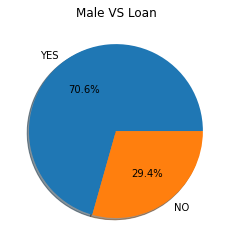

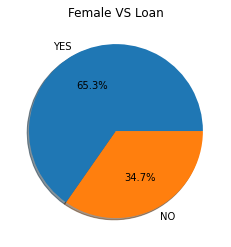

In [18]:
plt.pie(male_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Male VS Loan'))
plt.subplots()
plt.pie(female_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Female VS Loan'))

plt.show()

Probability of getting Loan as a Male is high as compare to female

#Married VS Unmarried

In [19]:
Married_loan=data[data['Married']=='Yes']
Unmarried_loan=data[data['Married']=='No']


Married_per=Married_loan['Loan_Status'].value_counts()
Married_per = Married_per/Married_loan.shape[0]*100

Unmarried_per=Unmarried_loan['Loan_Status'].value_counts()
Unmarried_per = Unmarried_per/Unmarried_loan.shape[0]*100

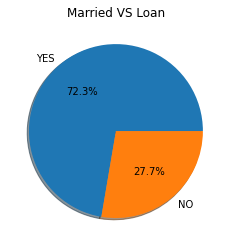

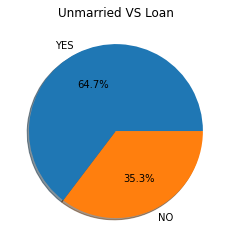

In [20]:
plt.pie(Married_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Married VS Loan'))
plt.subplots()
plt.pie(Unmarried_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Unmarried VS Loan'))

plt.show()

Probability of getting Loan as a Married is high as compare to Unmarried

#Graduate VS Not Graduate

In [21]:
G_loan=data[data['Education']=='Graduate']
NG_loan=data[data['Education']=='Not Graduate']


G_per=G_loan['Loan_Status'].value_counts()
G_per = G_per/G_loan.shape[0]*100

NG_per=NG_loan['Loan_Status'].value_counts()
NG_per = NG_per/NG_loan.shape[0]*100

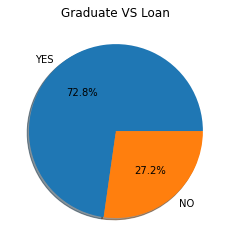

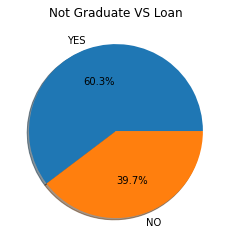

In [22]:
plt.pie(G_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Graduate VS Loan'))
plt.subplots()
plt.pie(NG_per,labels=['YES','NO'],shadow = True,autopct='%1.1f%%')
plt.title(label=('Not Graduate VS Loan'))

plt.show()

Probability of getting Loan as a Graduate is high as compare to Not Graduate

#label encoding

In [23]:
ob_col #object type columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [25]:
ob_col=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Property_Area',
 'Self_Employed']
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data[ob_col] = data[ob_col].apply(lb.fit_transform)

#Correlation

In [26]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.811538,0.646154,0.705769,0.251923,0.113462,3995.719231,1317.578692,124.360083,342.092308,0.839481,1.009615,0.696154
std,0.391457,0.478623,0.989329,0.434535,0.317462,1794.687196,1397.402837,39.984816,65.554395,0.352865,0.786387,0.460360
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2724.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3590.500000,1293.500000,123.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4772.750000,2191.000000,150.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10047.000000,5701.000000,236.000000,480.000000,1.000000,2.000000,1.000000


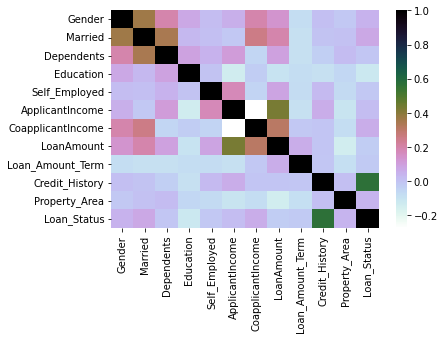

In [27]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='cubehelix_r')

In [28]:
#correlation table
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,0.19,0.08,0.02,0.06,0.20,0.14,-0.08,0.01,-0.01,0.05
Married,0.36,1.00,0.35,0.03,0.01,-0.01,0.26,0.20,-0.09,0.00,0.01,0.08
Dependents,0.19,0.35,1.00,0.09,0.05,0.11,-0.05,0.10,-0.09,-0.03,0.02,-0.01
Education,0.08,0.03,0.09,1.00,0.00,-0.14,-0.03,-0.10,-0.08,-0.09,-0.06,-0.12
Self_Employed,0.02,0.01,0.05,0.00,1.00,0.18,-0.05,0.09,-0.07,0.03,-0.07,-0.01
ApplicantIncome,0.06,-0.01,0.11,-0.14,0.18,1.00,-0.27,0.43,-0.09,0.06,-0.10,0.02
CoapplicantIncome,0.20,0.26,-0.05,-0.03,-0.05,-0.27,1.00,0.31,-0.01,-0.00,-0.08,0.06
LoanAmount,0.14,0.20,0.10,-0.10,0.09,0.43,0.31,1.00,0.06,-0.00,-0.14,-0.03
Loan_Amount_Term,-0.08,-0.09,-0.09,-0.08,-0.07,-0.09,-0.01,0.06,1.00,-0.01,-0.08,-0.02
Credit_History,0.01,0.00,-0.03,-0.09,0.03,0.06,-0.00,-0.00,-0.01,1.00,0.01,0.57


We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.


```

## Machine learning Models

First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.

 **Models we will use:**
Decision Tree, 
Random Forest, 
K-Nearest Neighbor, 
Logistic Regression,
Naive Bayes Classifier

In [29]:
X = data.drop('Loan_Status',axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [30]:
#we have one unknown value in data so we will modify it
X['Dependents'].replace("3+", 
           "4", 
           inplace=True)

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [35]:
y = data['Loan_Status']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=0)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Lets Compare the different ML Models

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [39]:
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
lr= LogisticRegression()

In [43]:
acc = []
pre = []
re = []
models = [rfc,dtc,knc,nb,lr]
models_name = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','LogisticRegression']

for i in models:
  i.fit(X_train,y_train)
  y_pred= i.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  acc.append(accuracy)
  pre.append(precision)
  re.append(recall)


In [44]:
m1 = pd.DataFrame()
m1['Models']=models_name
m1['Accuracy']= acc
m1['Precision']= pre
m1['Recall']= re

In [45]:
m1

,Models,Accuracy,Precision,Recall
0,RandomForestClassifier,0.788462,0.777778,0.940299
1,DecisionTreeClassifier,0.701923,0.764706,0.776119
2,KNeighborsClassifier,0.596154,0.640449,0.850746
3,GaussianNB,0.788462,0.764706,0.970149
4,LogisticRegression,0.778846,0.761905,0.955224


--- Credit_History is a very important variable because of its high correlation with Loan_Status therefor showind high Dependancy for the latter.


The RandomForestClassifier algorithm is the most accurate: approximately 80%.